In [22]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

class Net(nn.Module):
    def __init__(self, layers):
        super(Net, self).__init__()
        self.layers = nn.Sequential(*layers)

    def forward(self, input):
        return self.layers(input)

def time_of_exp(batch_size, layers, device='gpu'):  
     
    device = torch.device('mps') if device=='gpu' else torch.device('cpu')

    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),]
    )
    trainSet = datasets.MNIST(root='MNIST', download=True, train=True, transform=transform)
    trainLoader = dset.DataLoader(trainSet, batch_size=batch_size, shuffle=True)

    net = Net(layers).to(device)
    criterion = nn.NLLLoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    start = time.time()
    for epoch in range(epochs:= 6):
        for times, data in enumerate(trainLoader):
            inputs, labels = data[0].to(device), data[1].to(device)
            return inputs.view(inputs.shape[0], -1).shape, labels.shape
            inputs = inputs.view(inputs.shape[0], -1)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Foward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()    

    end = time.time()
    return (end - start)        

In [23]:
first_term = 128
common_ratio = 2
num_terms = 10

iter_list = [first_term*(common_ratio**i) for i in range(num_terms)]

### version 1

In [24]:
layers = [nn.Linear(in_features=784, out_features=128),
          nn.ReLU(),
          nn.Linear(in_features=128, out_features=10),
          nn.LogSoftmax(dim=1)]

In [ ]:
gpu_time = [[], []]

for i in iter_list:
    gpu_time[0].append(time_of_exp(i, layers, 'gpu'))
    
for i in iter_list:
    gpu_time[1].append(time_of_exp(i, layers, 'gpu'))

In [ ]:
cpu_time = [[], []]

for i in iter_list:
    cpu_time[0].append(time_of_exp(i, layers, 'cpu'))

for i in iter_list:
    cpu_time[1].append(time_of_exp(i, layers, 'cpu'))

/Users/ray/miniconda3/envs/torch/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ray/miniconda3/envs/torch/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


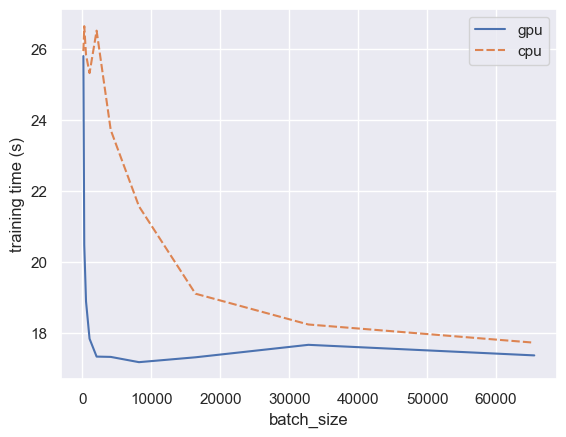

In [ ]:
avg_gpu_time = np.mean(gpu_time, axis=0).tolist()
avg_cpu_time = np.mean(cpu_time, axis=0).tolist()

avg_time = np.array([avg_gpu_time, avg_cpu_time]).T

line_plot = sns.lineplot(data=pd.DataFrame(avg_time, iter_list, ['gpu', 'cpu']))
line_plot.set_xlabel("batch_size")
line_plot.set_ylabel("training time (s)")
plt.savefig('torch_gpu_vs_cpu_v1.jpg', dpi=300) 
plt.show()

### Version 2

In [ ]:
layers = [nn.Linear(in_features=784, out_features=512),
          nn.ReLU(),
          nn.Linear(in_features=512, out_features=128),
          nn.ReLU(),
          nn.Linear(in_features=128, out_features=32),
          nn.ReLU(),
          nn.Linear(in_features=32, out_features=10),
          nn.LogSoftmax(dim=1)]          

In [ ]:
gpu_time = [[], []]

for i in iter_list:
    gpu_time[0].append(time_of_exp(i, layers, 'gpu'))

for i in iter_list:
    gpu_time[1].append(time_of_exp(i, layers, 'gpu'))

In [ ]:
cpu_time = [[], []]

for i in iter_list:
    cpu_time[0].append(time_of_exp(i, layers, 'cpu'))

for i in iter_list:
    cpu_time[1].append(time_of_exp(i, layers, 'cpu'))

/Users/ray/miniconda3/envs/torch/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ray/miniconda3/envs/torch/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


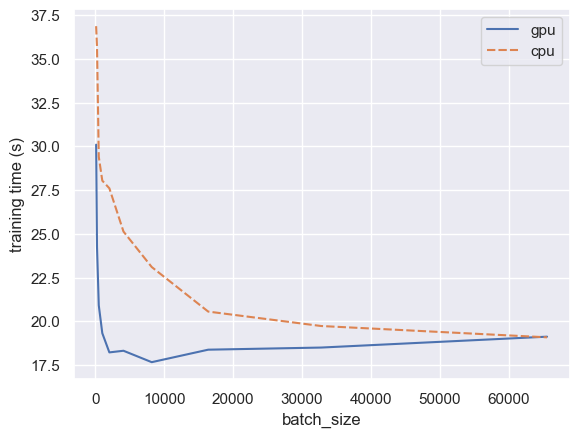

In [ ]:
avg_gpu_time = np.mean(gpu_time, axis=0).tolist()
avg_cpu_time = np.mean(cpu_time, axis=0).tolist()

avg_time = np.array([avg_gpu_time, avg_cpu_time]).T

line_plot = sns.lineplot(data=pd.DataFrame(avg_time, iter_list, ['gpu', 'cpu']))
line_plot.set_xlabel("batch_size")
line_plot.set_ylabel("training time (s)")
plt.savefig('torch_gpu_vs_cpu_v2.jpg', dpi=300) 
plt.show()